In [3]:
library("infer")
library("tidyverse")

# Fair coin example with infer package

In [14]:
heads_140 = data.frame(
  toss = c(rep("heads", 140), rep("tails", 250 - 140))
)

heads_140 |> head()
heads_140 |> tail()
heads_140 |> nrow()

,toss
,<chr>
1,heads
2,heads
3,heads
4,heads
5,heads
6,heads


,toss
,<chr>
245,tails
246,tails
247,tails
248,tails
249,tails
250,tails


[1] 250

In [13]:
heads_140 |> count(toss)

toss,n
<chr>,<int>
heads,140
tails,110


In [12]:
obs_n_heads = heads_140 |>
    specify(response = toss, success = "heads") |>
    calculate(stat = "count")

obs_n_heads

stat
<int>
140


In [11]:
heads_140 |>
    summarize(stat = sum(toss == 'heads'))

stat
<int>
140


In [10]:
null_dist = heads_140 |>
    specify(response = toss, success = 'heads') |>
    hypothesize('point', p = 0.5) |>
    generate(reps = 1000, type = 'draw') |>
    calculate(stat = 'count')

null_dist |> head()

replicate,stat
<int>,<int>
1,117
2,121
3,130
4,137
5,125
6,122


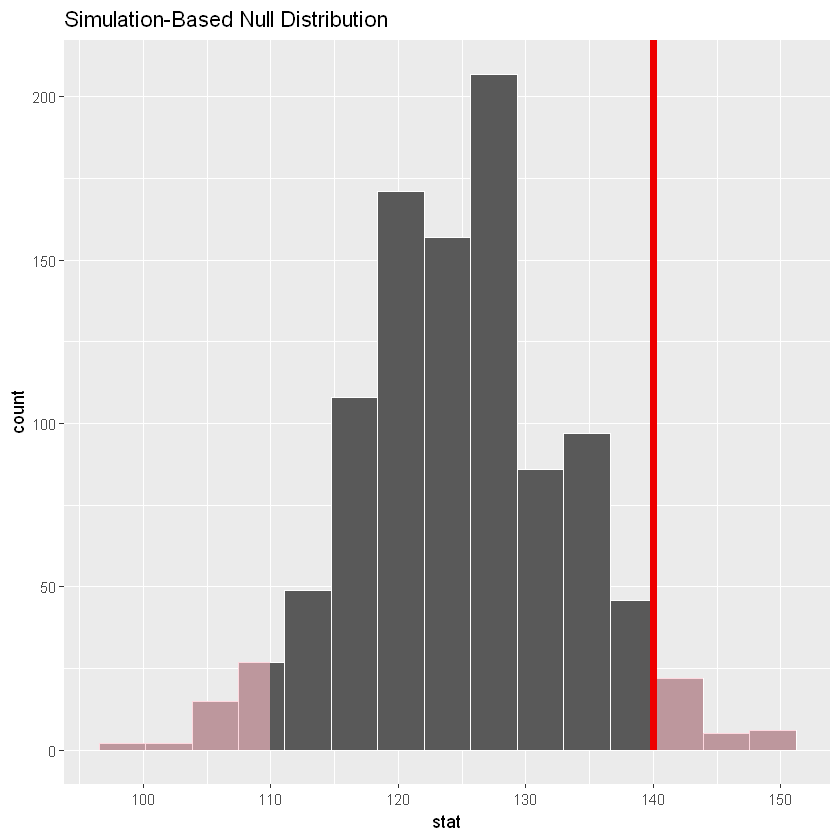

In [15]:
null_dist |>
  visualize() +
  shade_p_value(obs_stat = obs_n_heads, direction = "two-sided")

In [9]:

null_dist |> get_p_value(obs_stat = 140, direction = 'two-sided')

p_value
<dbl>
0.058


In [10]:
nsfg = read_csv('nsfg_simple.csv', col_types = cols())

nsfg |> head()

ERROR: Error: 'nsfg_simple.csv' does not exist in current working directory ('c:/Users/agung/Data 730/moderndive/inclass').


In [ ]:
nsfg |> summarize(cor_coef = cor(agepreg, totalwgt_lb, method = "pearson"))

In [ ]:
nsfg |>
  specify(response = totalwgt_lb, explanatory = agepreg) |>
  calculate(stat = "correlation")

In [ ]:
null_dist_nsfg = nsfg |>
  specify(response = totalwgt_lb, explanatory = agepreg) |>
  hypothesize("independence") |>
  generate(reps = 1000, type = "permute") |>
  calculate(stat = "correlation")

null_dist_nsfg |> head()

In [ ]:
null_dist_nsfg |> 
    visualize() + 
    shade_p_value(obs_stat = 0.0688, direction = 'two-sided')

In [ ]:
nsfg |> get_p_value(obs_stat = 0.06883397, direction = 'two-sided')

In [ ]:
ggplot(nsfg, aes(x = agepreg, totalwgt_lb)) + 
    geom_point(alpha = 0.1) +
    stat_smooth(method = 'lm')